In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("cleaned_electric_data.csv")
df.head()

Unnamed: 0         vin    county      city state  postal_code  model_year  \
0           0  5YJ3E1EA5L      King   Seattle    WA      98133.0        2020   
1           1  5UX43EU08R      King   Seattle    WA      98125.0        2024   
2           2  5UX43EU06R      King   Seattle    WA      98102.0        2024   
3           3  5YJ3E1EA1J      King  Kirkland    WA      98034.0        2018   
4           4  1G1RA6E43C  Thurston   Olympia    WA      98501.0        2012   

  manufacture    model                                    type  \
0       TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
1         BMW       X5  Plug-in Hybrid Electric Vehicle (PHEV)   
2         BMW       X5  Plug-in Hybrid Electric Vehicle (PHEV)   
3       TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
4   CHEVROLET     VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   

                                      cafv  e_range  base_msrp  legi_district  \
0  Clean Alternative Fuel Vehicle Eligible      266          0           46.0   
1  Clean Alternative Fuel Vehicle Eligible       39          0           46.0   
2  Clean Alternative Fuel Vehicle Eligible       39          0           43.0   
3  Clean Alternative Fuel Vehicle Eligible      215          0            1.0   
4  Clean Alternative Fuel Vehicle Eligible       35          0           35.0   

          id                     location  \
0  249903111  POINT (-122.35029 47.71871)   
1  264762606  POINT (-122.30253 47.72656)   
2  275506031  POINT (-122.32427 47.63433)   
3  117023581  POINT (-122.22901 47.72201)   
4  158415498  POINT (-122.89166 47.03956)   

                                       e_utility  2020_census_tract  \
0   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303300e+10   
1   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303300e+10   
2   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10   
3  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10   
4                         PUGET SOUND ENERGY INC       5.306701e+10   

         lat       lon  
0 -122.35029  47.71871  
1 -122.30253  47.72656  
2 -122.32427  47.63433  
3 -122.22901  47.72201  
4 -122.89166  47.03956

In [3]:
df=df.drop("Unnamed: 0",axis=1)
df.head()

vin    county      city state  postal_code  model_year manufacture  \
0  5YJ3E1EA5L      King   Seattle    WA      98133.0        2020       TESLA   
1  5UX43EU08R      King   Seattle    WA      98125.0        2024         BMW   
2  5UX43EU06R      King   Seattle    WA      98102.0        2024         BMW   
3  5YJ3E1EA1J      King  Kirkland    WA      98034.0        2018       TESLA   
4  1G1RA6E43C  Thurston   Olympia    WA      98501.0        2012   CHEVROLET   

     model                                    type  \
0  MODEL 3          Battery Electric Vehicle (BEV)   
1       X5  Plug-in Hybrid Electric Vehicle (PHEV)   
2       X5  Plug-in Hybrid Electric Vehicle (PHEV)   
3  MODEL 3          Battery Electric Vehicle (BEV)   
4     VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   

                                      cafv  e_range  base_msrp  legi_district  \
0  Clean Alternative Fuel Vehicle Eligible      266          0           46.0   
1  Clean Alternative Fuel Vehicle Eligible       39          0           46.0   
2  Clean Alternative Fuel Vehicle Eligible       39          0           43.0   
3  Clean Alternative Fuel Vehicle Eligible      215          0            1.0   
4  Clean Alternative Fuel Vehicle Eligible       35          0           35.0   

          id                     location  \
0  249903111  POINT (-122.35029 47.71871)   
1  264762606  POINT (-122.30253 47.72656)   
2  275506031  POINT (-122.32427 47.63433)   
3  117023581  POINT (-122.22901 47.72201)   
4  158415498  POINT (-122.89166 47.03956)   

                                       e_utility  2020_census_tract  \
0   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303300e+10   
1   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303300e+10   
2   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10   
3  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10   
4                         PUGET SOUND ENERGY INC       5.306701e+10   

         lat       lon  
0 -122.35029  47.71871  
1 -122.30253  47.72656  
2 -122.32427  47.63433  
3 -122.22901  47.72201  
4 -122.89166  47.03956

In [4]:
df.columns

Index(['vin', 'county', 'city', 'state', 'postal_code', 'model_year',
       'manufacture', 'model', 'type', 'cafv', 'e_range', 'base_msrp',
       'legi_district', 'id', 'location', 'e_utility', '2020_census_tract',
       'lat', 'lon'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219756 entries, 0 to 219755
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   vin                219756 non-null  object 
 1   county             219756 non-null  object 
 2   city               219756 non-null  object 
 3   state              219756 non-null  object 
 4   postal_code        219756 non-null  float64
 5   model_year         219756 non-null  int64  
 6   manufacture        219756 non-null  object 
 7   model              219756 non-null  object 
 8   type               219756 non-null  object 
 9   cafv               219756 non-null  object 
 10  e_range            219756 non-null  int64  
 11  base_msrp          219756 non-null  int64  
 12  legi_district      219756 non-null  float64
 13  id                 219756 non-null  int64  
 14  location           219756 non-null  object 
 15  e_utility          219756 non-null  object 
 16  20

In [6]:
df.county.nunique()

39

In [7]:
df.city.nunique()

485

In [8]:
df.state.nunique()

1

#### How many county are there? what are the top 10 county with the highest electric vehicle population?

In [9]:
df.county.nunique()

39

In [10]:
a=df.groupby("county")["vin"].count().nlargest(10)
print("The top 10 counties by populations.")
print(a)
print("The top 10 counties by percentages.")
print(a/df.vin.count())
pct=round(a.sum()/df.vin.count()*100,2)
print(f"The total electric vehicle in top 10 county is {a.sum()} out of the total population of {df.vin.count()}, about {pct} percent.")
b=round(a/df.vin.count()*100,2).reset_index()
b.columns=["county","percentage"]
print("The percentage of each county's electric vehicle out of the state's total population is the following:")
b
top_county=b.county.tolist()
top_county

The top 10 counties by populations.
county
King         111709
Snohomish     26633
Pierce        17645
Clark         13205
Thurston       8061
Kitsap         7311
Spokane        6139
Whatcom        5347
Benton         2800
Skagit         2468
Name: vin, dtype: int64
The top 10 counties by percentages.
county
King         0.508332
Snohomish    0.121194
Pierce       0.080294
Clark        0.060089
Thurston     0.036682
Kitsap       0.033269
Spokane      0.027936
Whatcom      0.024332
Benton       0.012741
Skagit       0.011231
Name: vin, dtype: float64
The total electric vehicle in top 10 county is 201318 out of the total population of 219756, about 91.61 percent.
The percentage of each county's electric vehicle out of the state's total population is the following:


['King',
 'Snohomish',
 'Pierce',
 'Clark',
 'Thurston',
 'Kitsap',
 'Spokane',
 'Whatcom',
 'Benton',
 'Skagit']

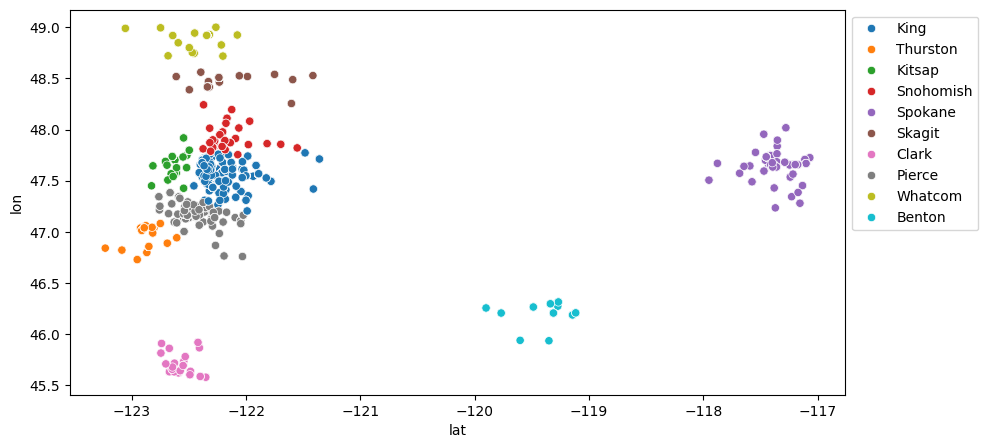

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(df.query("county in @top_county"),x="lat",y="lon",hue="county")
#sns.scatterplot(df.query("county not in @top_county"),x="lat",y="lon",color="black",alpha=0.5)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### Popular brands of e-vehicles

In [12]:
df.manufacture.value_counts(normalize=True).iloc[:10]

manufacture
TESLA         0.432976
CHEVROLET     0.073140
NISSAN        0.068917
FORD          0.052786
KIA           0.047293
BMW           0.040877
TOYOTA        0.039617
HYUNDAI       0.029856
RIVIAN        0.027958
VOLKSWAGEN    0.026384
Name: proportion, dtype: float64

In [13]:
df.manufacture.value_counts(normalize=True).iloc[:10].sum()

np.float64(0.8398041464169352)

In [14]:
df.query("county=='King'").manufacture.value_counts(normalize=True).iloc[:10]

manufacture
TESLA        0.466086
NISSAN       0.064552
CHEVROLET    0.058178
BMW          0.047561
KIA          0.041572
FORD         0.039048
RIVIAN       0.031501
TOYOTA       0.029836
HYUNDAI      0.029747
VOLVO        0.028619
Name: proportion, dtype: float64

In [15]:
df.query("county=='Pierce'").manufacture.value_counts(normalize=True).iloc[:10]

manufacture
TESLA        0.409634
CHEVROLET    0.078209
FORD         0.071692
NISSAN       0.067895
KIA          0.060074
TOYOTA       0.038198
BMW          0.037348
RIVIAN       0.030264
HYUNDAI      0.028053
JEEP         0.023803
Name: proportion, dtype: float64

In [16]:
df.query("county=='Clark'").manufacture.value_counts(normalize=True).iloc[:10]

manufacture
TESLA         0.409920
TOYOTA        0.076335
CHEVROLET     0.075653
NISSAN        0.065960
FORD          0.055055
KIA           0.050587
BMW           0.037259
JEEP          0.033321
HYUNDAI       0.032336
VOLKSWAGEN    0.025521
Name: proportion, dtype: float64

In [17]:
df.query("county=='Snohomish'").manufacture.value_counts(normalize=True).iloc[:10]

manufacture
TESLA         0.501370
NISSAN        0.071490
CHEVROLET     0.060188
FORD          0.053130
KIA           0.044569
BMW           0.033342
TOYOTA        0.030113
HYUNDAI       0.029813
VOLKSWAGEN    0.022491
RIVIAN        0.021890
Name: proportion, dtype: float64

#### King county has over half of the state's electric vehicle.

#### How many cities are there in Washington state? WHat are the top cities with the most amount of electric vehicles? what counties are they populated at?

In [18]:
df.city.nunique()

485

In [19]:
a=df.groupby(["county","city"])["vin"].count().reset_index().sort_values("vin",ascending=False).iloc[:20]
a.rename(columns={"vin":"total"},inplace=True)
a=a.assign(
    percentage=round(a.total/df.vin.count()*100,2)
)
print(f"The top 20 cities with the most amount of e-cars are {round(a.percentage.sum(),2)}.")
top_city=a.city.tolist()
print(a)
top_city

The top 20 cities with the most amount of e-cars are 58.46.
        county           city  total  percentage
171       King        Seattle  35207       16.02
138       King       Bellevue  10869        4.95
42       Clark      Vancouver   7935        3.61
167       King        Redmond   7727        3.52
168       King         Renton   6382        2.90
155       King       Kirkland   6358        2.89
169       King      Sammamish   6233        2.84
388  Snohomish        Bothell   5690        2.59
461   Thurston        Olympia   5277        2.40
349     Pierce         Tacoma   4721        2.15
154       King           Kent   3743        1.70
481    Whatcom     Bellingham   3619        1.65
434    Spokane        Spokane   3607        1.64
397  Snohomish       Lynnwood   3508        1.60
392  Snohomish        Everett   3282        1.49
152       King       Issaquah   3268        1.49
176       King        Tukwila   3222        1.47
159       King  Mercer Island   2723        1.24
178      

['Seattle',
 'Bellevue',
 'Vancouver',
 'Redmond',
 'Renton',
 'Kirkland',
 'Sammamish',
 'Bothell',
 'Olympia',
 'Tacoma',
 'Kent',
 'Bellingham',
 'Spokane',
 'Lynnwood',
 'Everett',
 'Issaquah',
 'Tukwila',
 'Mercer Island',
 'Woodinville',
 'Snohomish']

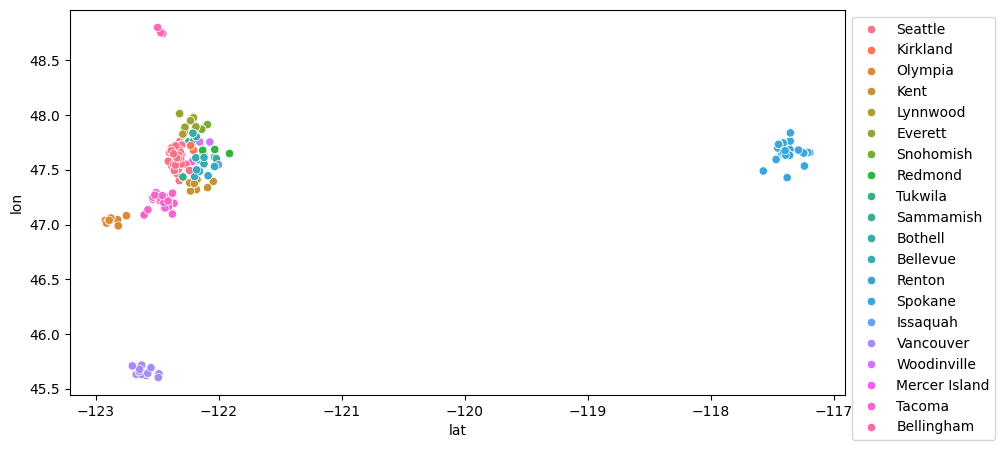

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(df.query("city in @top_city"),x="lat",y="lon",hue="city")
#sns.scatterplot(df.query("city not in @top_city"),x="lat",y="lon",label="other cities")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [21]:
a.county.value_counts()

county
King         11
Snohomish     4
Clark         1
Thurston      1
Pierce        1
Whatcom       1
Spokane       1
Name: count, dtype: int64

In [22]:
df.columns

Index(['vin', 'county', 'city', 'state', 'postal_code', 'model_year',
       'manufacture', 'model', 'type', 'cafv', 'e_range', 'base_msrp',
       'legi_district', 'id', 'location', 'e_utility', '2020_census_tract',
       'lat', 'lon'],
      dtype='object')

#### vehicle analysis

#### Top 10 manufactures

In [23]:
top_manu=df.manufacture.value_counts().iloc[:10].index.tolist()
print(f"Top vehicle manufactures are {top_manu}.")

Top vehicle manufactures are ['TESLA', 'CHEVROLET', 'NISSAN', 'FORD', 'KIA', 'BMW', 'TOYOTA', 'HYUNDAI', 'RIVIAN', 'VOLKSWAGEN'].


In [24]:
df.manufacture.value_counts().iloc[:10]

manufacture
TESLA         95149
CHEVROLET     16073
NISSAN        15145
FORD          11600
KIA           10393
BMW            8983
TOYOTA         8706
HYUNDAI        6561
RIVIAN         6144
VOLKSWAGEN     5798
Name: count, dtype: int64

In [25]:
a=df.manufacture.value_counts(normalize=True).iloc[:10]*100
a=a.reset_index().rename(columns={"proportion":"Percentage"})
a

manufacture  Percentage
0       TESLA   43.297566
1   CHEVROLET    7.314021
2      NISSAN    6.891734
3        FORD    5.278582
4         KIA    4.729336
5         BMW    4.087715
6      TOYOTA    3.961667
7     HYUNDAI    2.985584
8      RIVIAN    2.795828
9  VOLKSWAGEN    2.638381

In [26]:
perc=round(df.manufacture.value_counts().iloc[:10].sum()/df.vin.count(),4)
print(f"The percentage of total manufacture counts for {perc*100}% of total electric vehicles in Washington.")

The percentage of total manufacture counts for 83.98% of total electric vehicles in Washington.


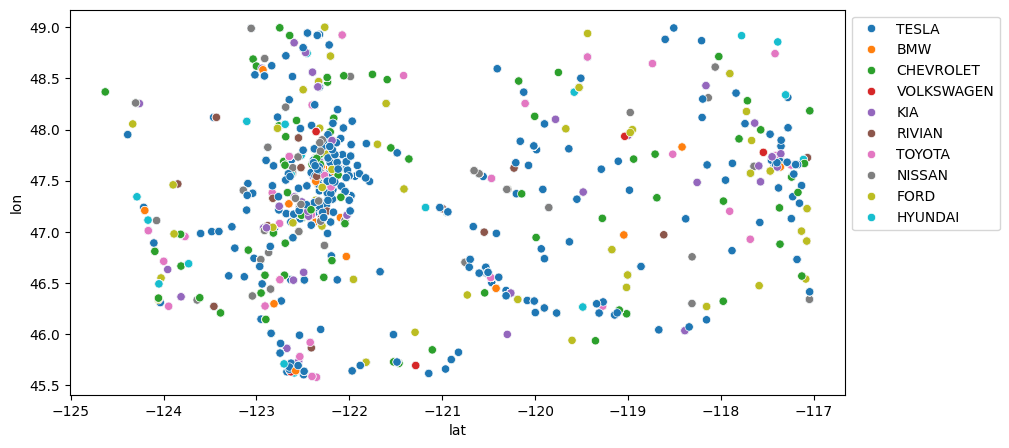

In [27]:
plt.figure(figsize=(10,5))
sns.scatterplot(df.query("manufacture in @top_manu"),x="lat",y="lon",hue="manufacture")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### all those vehicles are spread out across washington state.

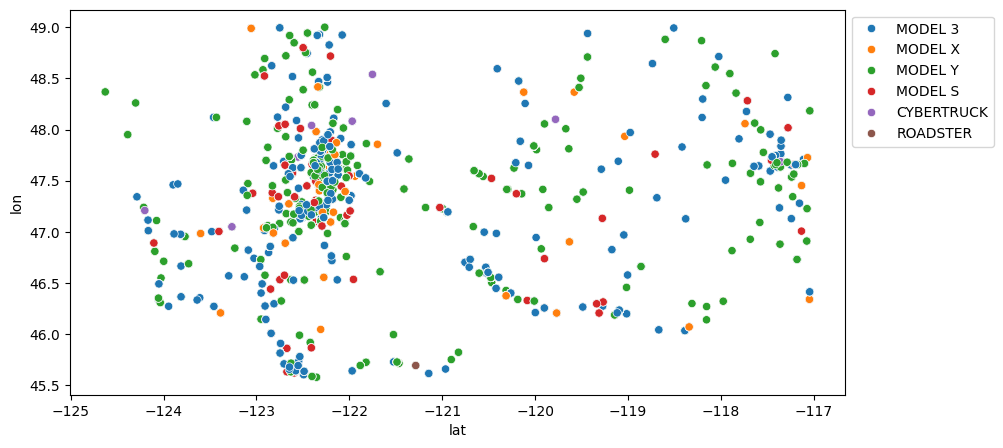

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(df.query("manufacture=='TESLA'"),x="lat",y="lon",hue="model")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

model
MODEL Y       45691
MODEL 3       34375
MODEL S        7805
MODEL X        6275
CYBERTRUCK      952
ROADSTER         51
Name: count, dtype: int64
model
MODEL Y       0.207917
MODEL 3       0.156423
MODEL S       0.035517
MODEL X       0.028554
CYBERTRUCK    0.004332
ROADSTER      0.000232
Name: count, dtype: float64


<Axes: xlabel='model'>

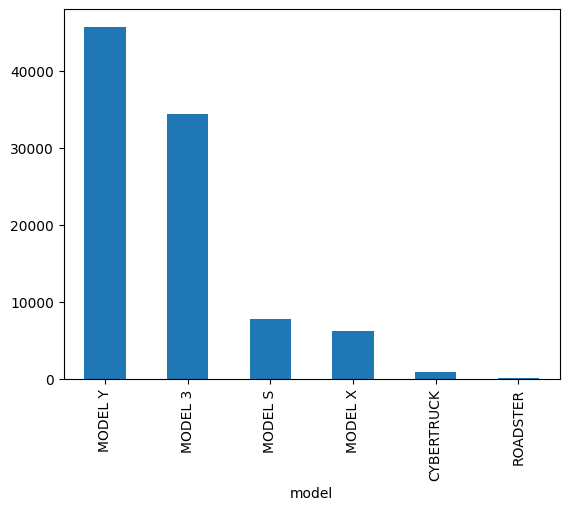

In [29]:
print(df.query("manufacture=='TESLA'")["model"].value_counts())
print(df.query("manufacture=='TESLA'")["model"].value_counts()/df.vin.count())
df.query("manufacture=='TESLA'")["model"].value_counts().plot.bar()

#### Deep dive of the top 4 manufactures in terms of all the models.

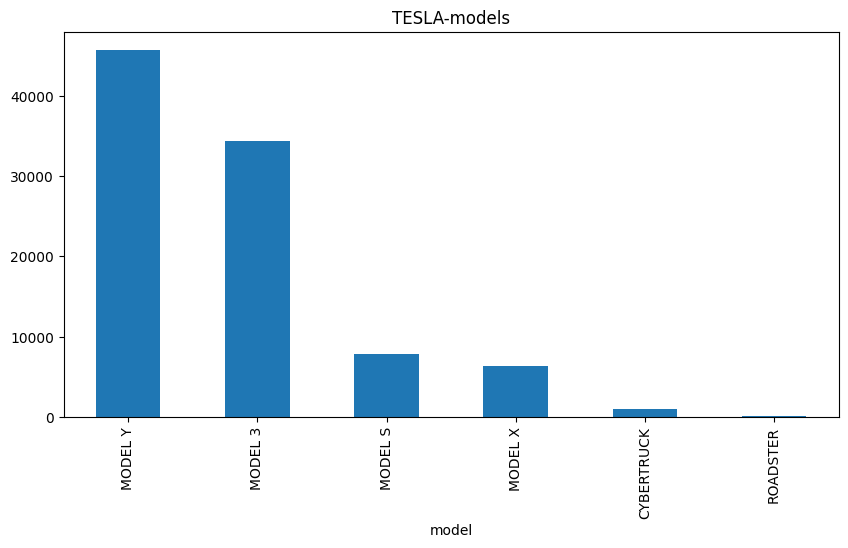

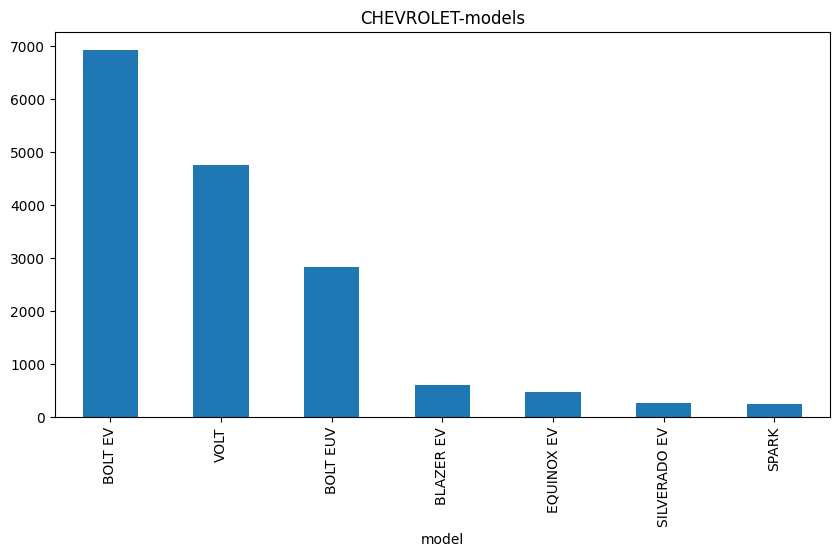

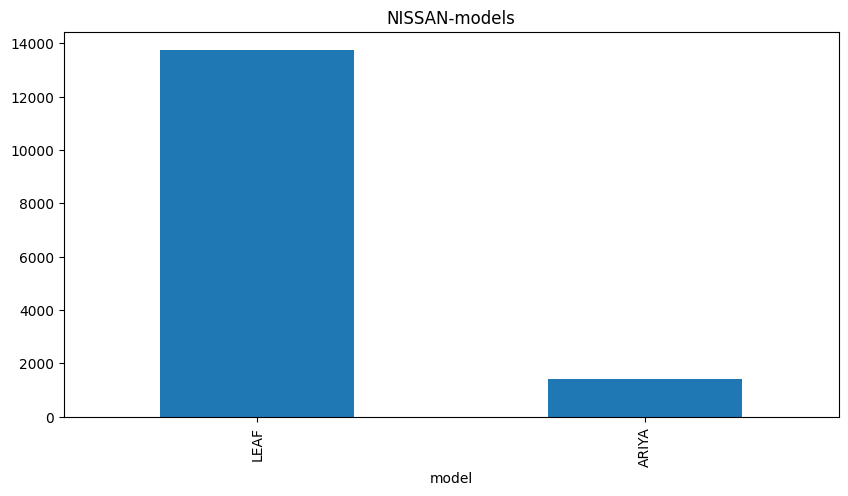

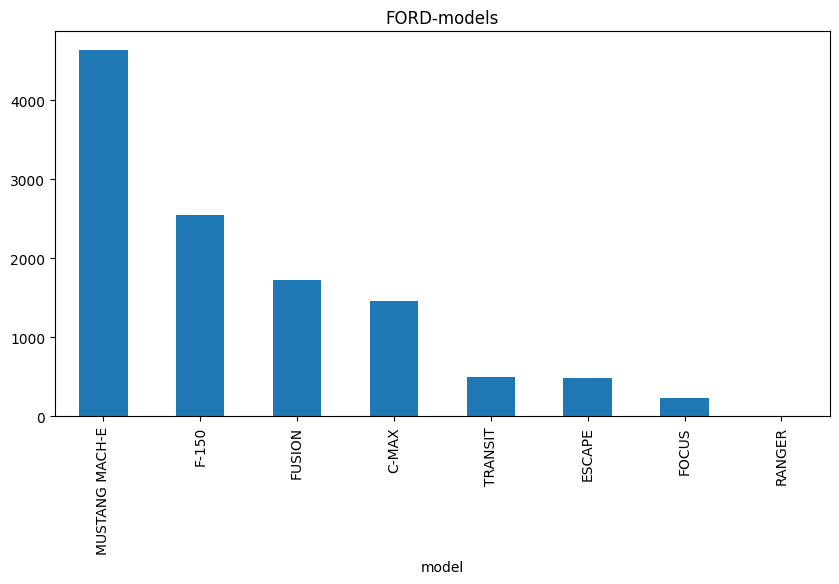

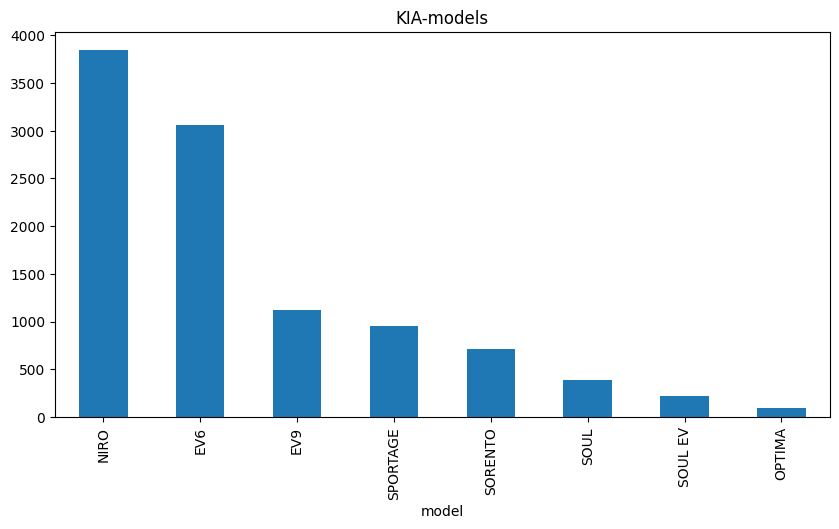

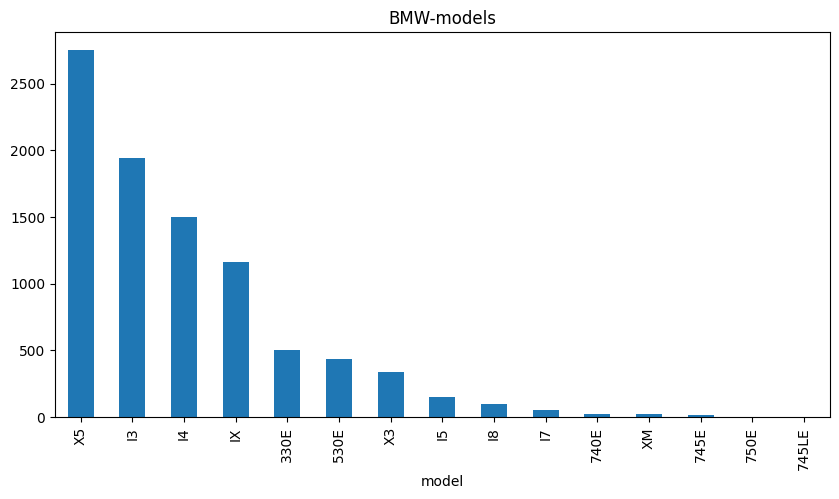

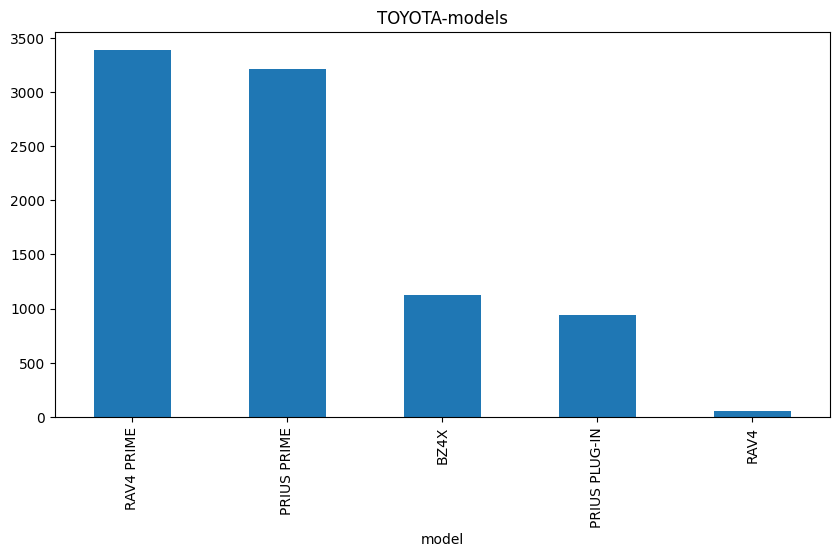

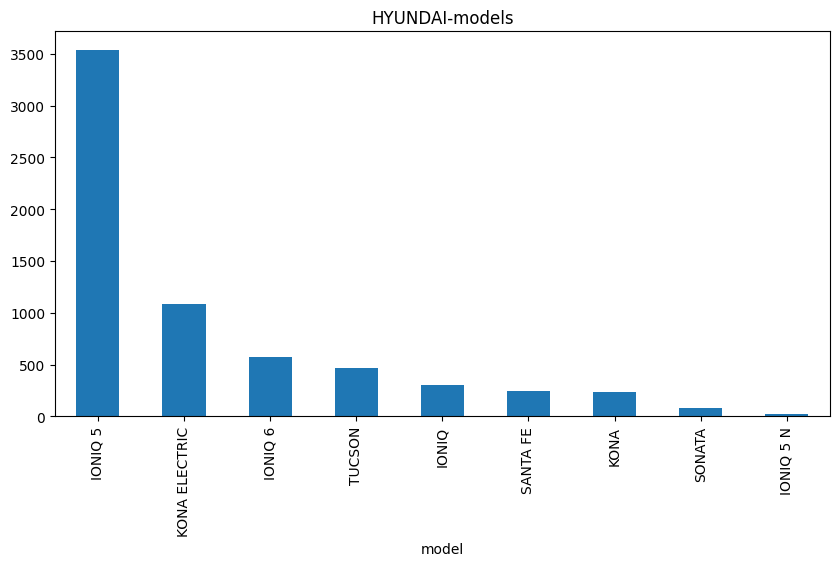

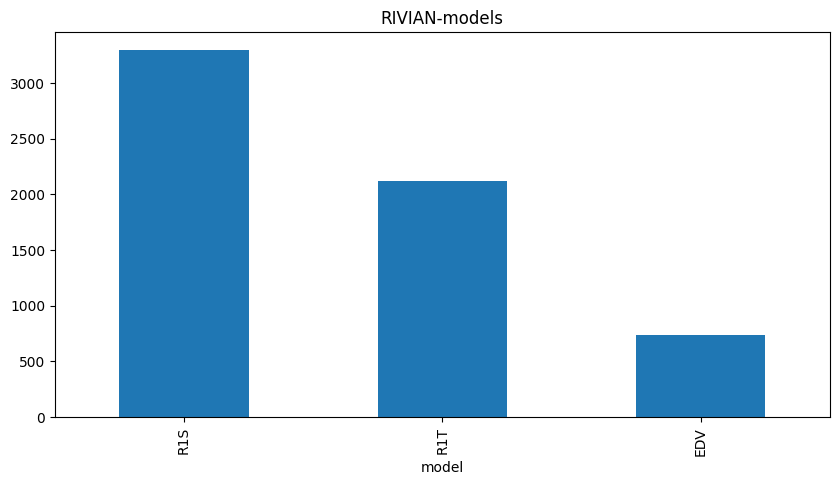

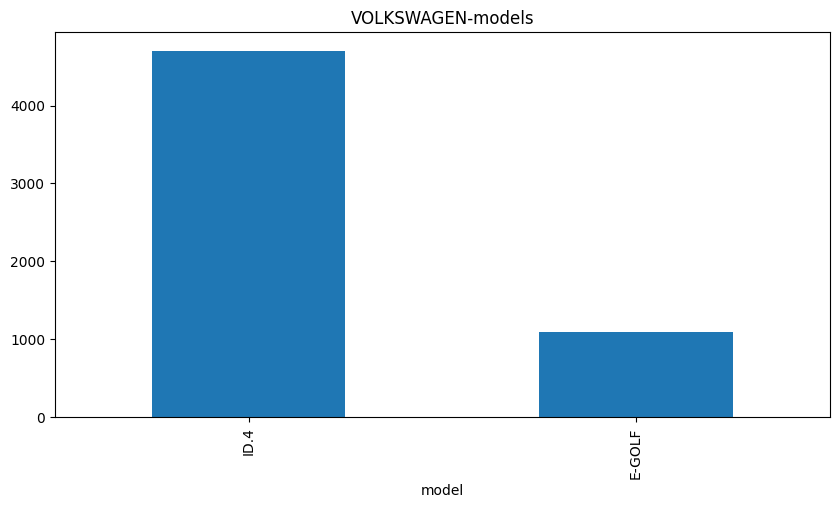

In [30]:
for m in top_manu:
    plt.figure(figsize=(10,5))
    df.query("manufacture==@m")["model"].value_counts().plot.bar()
    plt.title(f"{m}-models")
    plt.show()

#### Popularity by Models

In [31]:
df.groupby("model").vin.count().sort_values(ascending=False).iloc[:20]

model
MODEL Y           45691
MODEL 3           34375
LEAF              13736
MODEL S            7805
BOLT EV            6929
MODEL X            6275
VOLT               4750
ID.4               4706
MUSTANG MACH-E     4638
WRANGLER           4205
NIRO               3843
PACIFICA           3700
IONIQ 5            3538
RAV4 PRIME         3384
R1S                3292
PRIUS PRIME        3209
EV6                3065
BOLT EUV           2832
X5                 2749
F-150              2546
Name: vin, dtype: int64

In [32]:
df.groupby("model").vin.count().sort_values(ascending=False).iloc[:10]/df.vin.count()

model
MODEL Y           0.207917
MODEL 3           0.156423
LEAF              0.062506
MODEL S           0.035517
BOLT EV           0.031530
MODEL X           0.028554
VOLT              0.021615
ID.4              0.021415
MUSTANG MACH-E    0.021105
WRANGLER          0.019135
Name: vin, dtype: float64

#### Model years 

In [33]:
df.groupby("model_year").vin.count()

model_year
1999        2
2000        7
2002        2
2003        1
2008       23
2010       24
2011      696
2012     1531
2013     4250
2014     3433
2015     4685
2016     5431
2017     8291
2018    14214
2019    10830
2020    12244
2021    20160
2022    28571
2023    59707
2024    43135
2025     2519
Name: vin, dtype: int64

In [34]:
a=df.groupby(["model_year","manufacture"]).vin.count().reset_index()

fig=px.bar(a,x="model_year",y="vin",color="manufacture",width=800,height=500)
fig.update_layout(title="Annual Units by production")
fig.show()

<Axes: xlabel='model_year'>

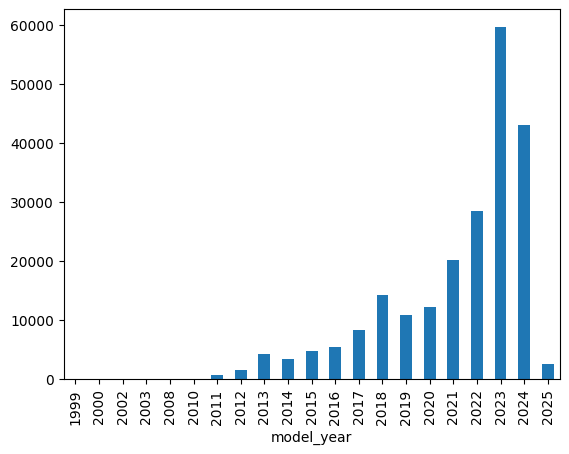

In [35]:
df.groupby("model_year").vin.count().plot.bar()

#### The purchase of electric vehicles in the state of washington had peaked in 2023 and coming down 

In [36]:
df.query("manufacture=='TESLA'").groupby("model_year").vin.count()

model_year
2008       23
2010       21
2011        7
2012      128
2013      715
2014      609
2015     1002
2016     1589
2017     1636
2018     7835
2019     4576
2020     7088
2021    11328
2022    13809
2023    27557
2024    16800
2025      426
Name: vin, dtype: int64

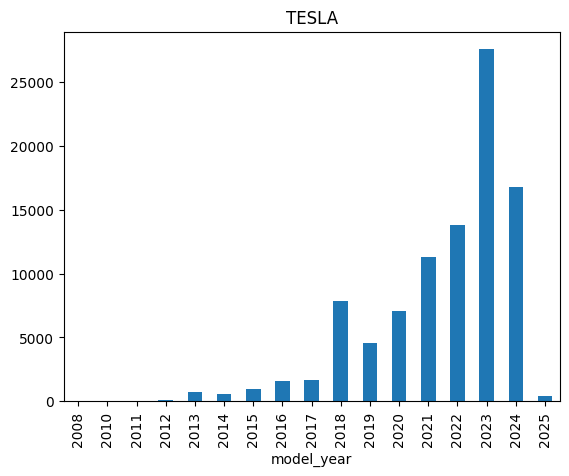

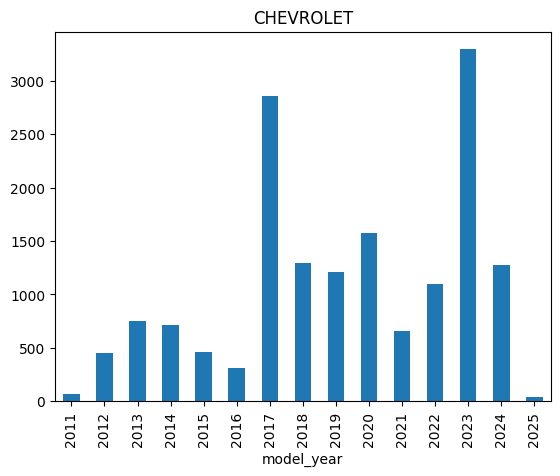

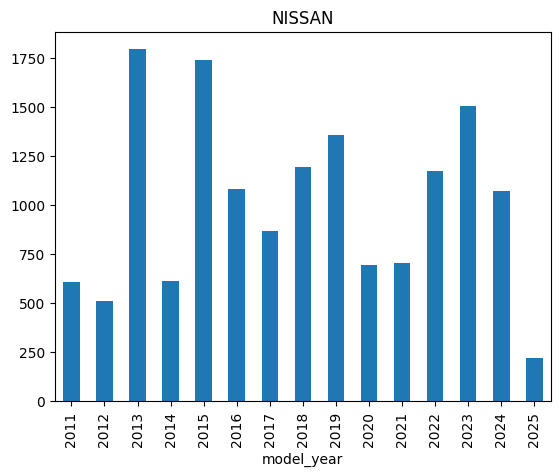

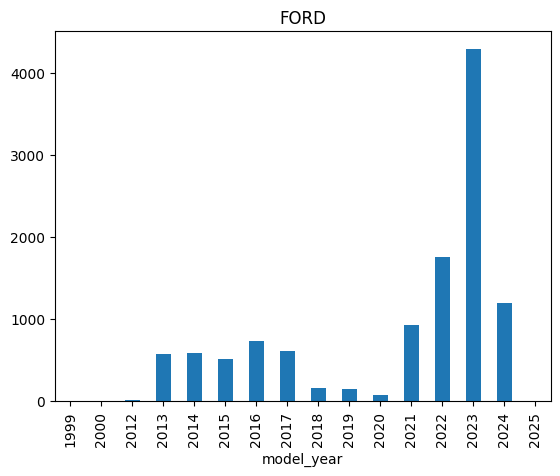

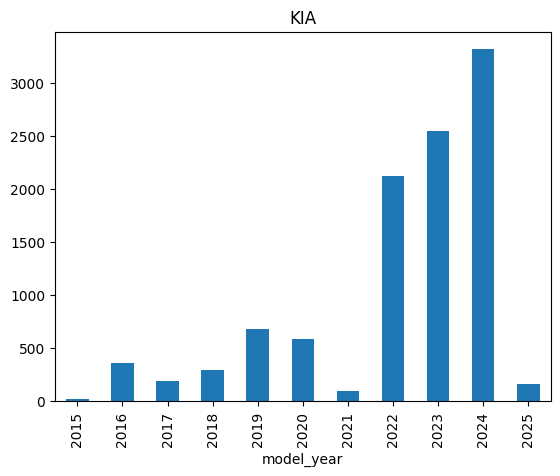

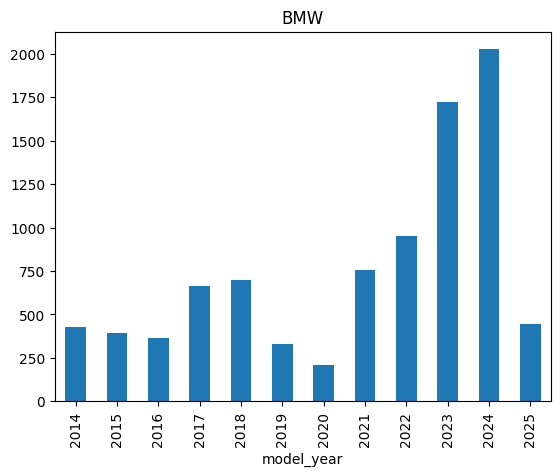

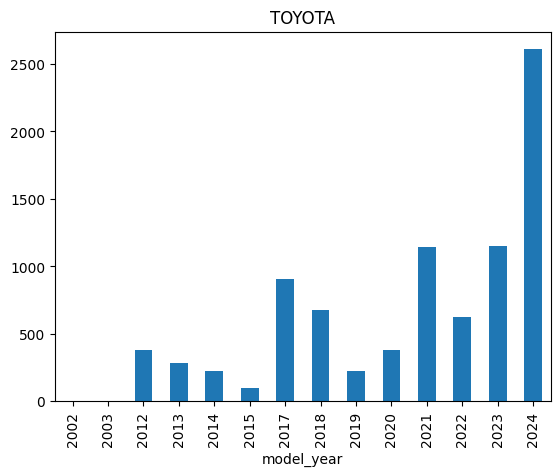

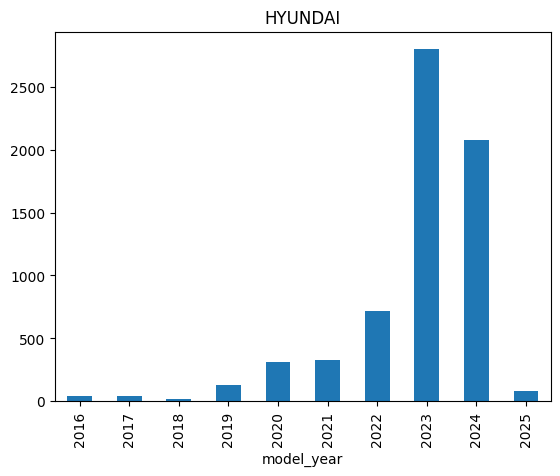

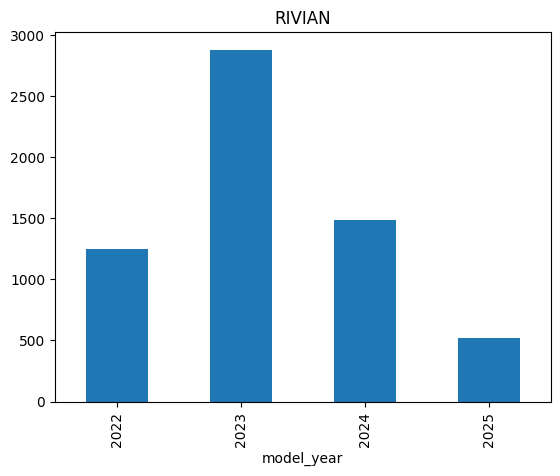

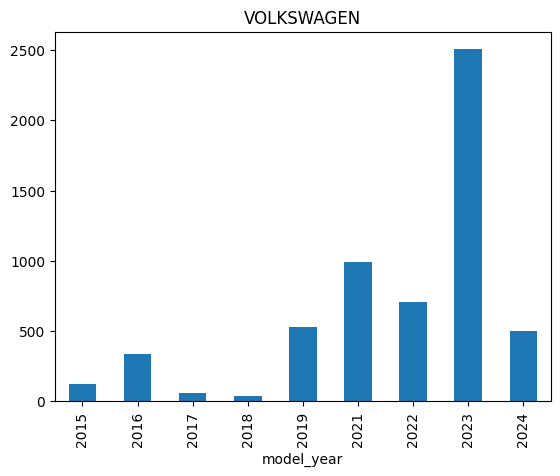

In [37]:
for m in top_manu:
    plt.figure()
    df.query("manufacture==@m").groupby("model_year").vin.count().plot.bar()
    plt.title(f"{m}")
    plt.show()

In [38]:
top_manu

['TESLA',
 'CHEVROLET',
 'NISSAN',
 'FORD',
 'KIA',
 'BMW',
 'TOYOTA',
 'HYUNDAI',
 'RIVIAN',
 'VOLKSWAGEN']

In [39]:
df.columns

Index(['vin', 'county', 'city', 'state', 'postal_code', 'model_year',
       'manufacture', 'model', 'type', 'cafv', 'e_range', 'base_msrp',
       'legi_district', 'id', 'location', 'e_utility', '2020_census_tract',
       'lat', 'lon'],
      dtype='object')

In [40]:
df.type.head()
df.cafv.head()

0    Clean Alternative Fuel Vehicle Eligible
1    Clean Alternative Fuel Vehicle Eligible
2    Clean Alternative Fuel Vehicle Eligible
3    Clean Alternative Fuel Vehicle Eligible
4    Clean Alternative Fuel Vehicle Eligible
Name: cafv, dtype: object

#### Type vehicle

In [41]:
df.query("manufacture in @top_manu").groupby("manufacture")["type"].value_counts(normalize=True).unstack().sort_values(by="Battery Electric Vehicle (BEV)",ascending=False)

type         Battery Electric Vehicle (BEV)  \
manufacture                                   
VOLKSWAGEN                         1.000000   
NISSAN                             1.000000   
TESLA                              1.000000   
RIVIAN                             1.000000   
HYUNDAI                            0.855662   
KIA                                0.715289   
CHEVROLET                          0.704473   
FORD                               0.683448   
BMW                                0.386953   
TOYOTA                             0.134964   

type         Plug-in Hybrid Electric Vehicle (PHEV)  
manufacture                                          
VOLKSWAGEN                                      NaN  
NISSAN                                          NaN  
TESLA                                           NaN  
RIVIAN                                          NaN  
HYUNDAI                                    0.144338  
KIA                                        0.284711  
CHEVROLET                                  0.295527  
FORD                                       0.316552  
BMW                                        0.613047  
TOYOTA                                     0.865036

In [42]:
df.type.value_counts(normalize=True)

type
Battery Electric Vehicle (BEV)            0.791246
Plug-in Hybrid Electric Vehicle (PHEV)    0.208754
Name: proportion, dtype: float64

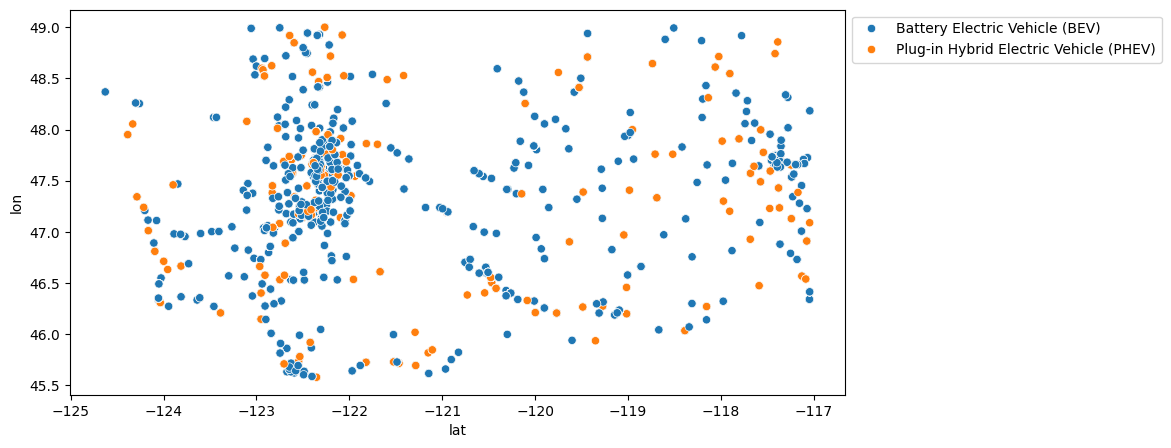

In [43]:
plt.figure(figsize=(10,5))
sns.scatterplot(df,x="lat",y="lon",hue="type")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### Top 10 longest range in temrs of models

In [44]:
df.groupby(["manufacture","model","type"])["e_range"].mean().sort_values(ascending=False).iloc[:10]

manufacture  model     type                          
PORSCHE      MACAN     Battery Electric Vehicle (BEV)    305.500000
HYUNDAI      KONA      Battery Electric Vehicle (BEV)    258.000000
TESLA        ROADSTER  Battery Electric Vehicle (BEV)    229.411765
JAGUAR       I-PACE    Battery Electric Vehicle (BEV)    199.296610
TESLA        MODEL S   Battery Electric Vehicle (BEV)    172.030621
CHEVROLET    BOLT EV   Battery Electric Vehicle (BEV)    166.345216
AUDI         E-TRON    Battery Electric Vehicle (BEV)    127.584586
TESLA        MODEL X   Battery Electric Vehicle (BEV)    126.296414
HYUNDAI      IONIQ     Battery Electric Vehicle (BEV)    125.373333
VOLKSWAGEN   E-GOLF    Battery Electric Vehicle (BEV)    107.307692
Name: e_range, dtype: float64

#### The top 10 long e_range are all BEV.

#### base_msrp

In [45]:
df[["manufacture","model","type","base_msrp"]].query("base_msrp>0").groupby(["manufacture","model","type"]).mean().sort_values(by="base_msrp",ascending=False).iloc[:50]

base_msrp
manufacture          model      type                                                 
PORSCHE              918        Plug-in Hybrid Electric Vehicle (PHEV)  845000.000000
                     PANAMERA   Plug-in Hybrid Electric Vehicle (PHEV)  184400.000000
TESLA                ROADSTER   Battery Electric Vehicle (BEV)          105397.000000
FISKER               KARMA      Plug-in Hybrid Electric Vehicle (PHEV)  102000.000000
BMW                  740E       Plug-in Hybrid Electric Vehicle (PHEV)   90353.846154
PORSCHE              CAYENNE    Plug-in Hybrid Electric Vehicle (PHEV)   81100.000000
CADILLAC             CT6        Plug-in Hybrid Electric Vehicle (PHEV)   75095.000000
TESLA                MODEL S    Battery Electric Vehicle (BEV)           69018.457300
VOLVO                XC90       Plug-in Hybrid Electric Vehicle (PHEV)   64950.000000
BMW                  530E       Plug-in Hybrid Electric Vehicle (PHEV)   54314.912281
VOLVO                XC60       Plug-in Hybrid Electric Vehicle (PHEV)   52900.000000
BMW                  330E       Plug-in Hybrid Electric Vehicle (PHEV)   44737.016575
CHRYSLER             PACIFICA   Plug-in Hybrid Electric Vehicle (PHEV)   39995.000000
MINI                 COUNTRYMAN Plug-in Hybrid Electric Vehicle (PHEV)   36865.384615
SUBARU               CROSSTREK  Plug-in Hybrid Electric Vehicle (PHEV)   34995.000000
WHEEGO ELECTRIC CARS WHEEGO     Plug-in Hybrid Electric Vehicle (PHEV)   32995.000000
KIA                  SOUL EV    Battery Electric Vehicle (BEV)           32816.666667
                     SOUL       Battery Electric Vehicle (BEV)           31950.000000

In [46]:
df[["manufacture","model","type","base_msrp"]].query("base_msrp>0").groupby(["manufacture","model","type"]).mean().sort_values(by="base_msrp",ascending=True).iloc[:50]


base_msrp
manufacture          model      type                                                 
KIA                  SOUL       Battery Electric Vehicle (BEV)           31950.000000
                     SOUL EV    Battery Electric Vehicle (BEV)           32816.666667
WHEEGO ELECTRIC CARS WHEEGO     Plug-in Hybrid Electric Vehicle (PHEV)   32995.000000
SUBARU               CROSSTREK  Plug-in Hybrid Electric Vehicle (PHEV)   34995.000000
MINI                 COUNTRYMAN Plug-in Hybrid Electric Vehicle (PHEV)   36865.384615
CHRYSLER             PACIFICA   Plug-in Hybrid Electric Vehicle (PHEV)   39995.000000
BMW                  330E       Plug-in Hybrid Electric Vehicle (PHEV)   44737.016575
VOLVO                XC60       Plug-in Hybrid Electric Vehicle (PHEV)   52900.000000
BMW                  530E       Plug-in Hybrid Electric Vehicle (PHEV)   54314.912281
VOLVO                XC90       Plug-in Hybrid Electric Vehicle (PHEV)   64950.000000
TESLA                MODEL S    Battery Electric Vehicle (BEV)           69018.457300
CADILLAC             CT6        Plug-in Hybrid Electric Vehicle (PHEV)   75095.000000
PORSCHE              CAYENNE    Plug-in Hybrid Electric Vehicle (PHEV)   81100.000000
BMW                  740E       Plug-in Hybrid Electric Vehicle (PHEV)   90353.846154
FISKER               KARMA      Plug-in Hybrid Electric Vehicle (PHEV)  102000.000000
TESLA                ROADSTER   Battery Electric Vehicle (BEV)          105397.000000
PORSCHE              PANAMERA   Plug-in Hybrid Electric Vehicle (PHEV)  184400.000000
                     918        Plug-in Hybrid Electric Vehicle (PHEV)  845000.000000

#### The most asking price for manufacturings

In [47]:
df[["manufacture","type","base_msrp"]].query("base_msrp>0").groupby(["manufacture","type"]).mean().sort_values(by="base_msrp",ascending=False).unstack()

base_msrp  \
type                 Battery Electric Vehicle (BEV)   
manufacture                                           
BMW                                             NaN   
CADILLAC                                        NaN   
CHRYSLER                                        NaN   
FISKER                                          NaN   
KIA                                    32268.825561   
MINI                                            NaN   
PORSCHE                                         NaN   
SUBARU                                          NaN   
TESLA                                  70229.460719   
VOLVO                                           NaN   
WHEEGO ELECTRIC CARS                            NaN   

                                                             
type                 Plug-in Hybrid Electric Vehicle (PHEV)  
manufacture                                                  
BMW                                            52695.833333  
CADILLAC                                       75095.000000  
CHRYSLER                                       39995.000000  
FISKER                                        102000.000000  
KIA                                                     NaN  
MINI                                           36865.384615  
PORSCHE                                       133883.333333  
SUBARU                                         34995.000000  
TESLA                                                   NaN  
VOLVO                                          56370.711974  
WHEEGO ELECTRIC CARS                           32995.000000

In [48]:
#### PHEV is more expensive than BEV

In [49]:
df.columns

Index(['vin', 'county', 'city', 'state', 'postal_code', 'model_year',
       'manufacture', 'model', 'type', 'cafv', 'e_range', 'base_msrp',
       'legi_district', 'id', 'location', 'e_utility', '2020_census_tract',
       'lat', 'lon'],
      dtype='object')

In [50]:
df.cafv.value_counts(normalize=True)

cafv
Eligibility unknown as battery range has not been researched    0.578296
Clean Alternative Fuel Vehicle Eligible                         0.322421
Not eligible due to low battery range                           0.099283
Name: proportion, dtype: float64

In [51]:
#### Top 10 manufactures

In [52]:
# for m in top_manu:
#     plt.figure(figsize=(10,5))
#     df.query("manufacture==@m")["cafv"].value_counts().plot.bar()
#     #plt.legend()
#     plt.title(f"{m}")
#    plt.show()
df.query("manufacture in @top_manu").groupby("manufacture")["cafv"].value_counts(normalize=True).unstack().sort_values("Clean Alternative Fuel Vehicle Eligible", ascending=False)

cafv         Clean Alternative Fuel Vehicle Eligible  \
manufacture                                            
NISSAN                                      0.687091   
CHEVROLET                                   0.603310   
BMW                                         0.464433   
TOYOTA                                      0.455088   
KIA                                         0.347926   
TESLA                                       0.265142   
VOLKSWAGEN                                  0.188341   
HYUNDAI                                     0.162780   
FORD                                        0.063017   
RIVIAN                                           NaN   

cafv         Eligibility unknown as battery range has not been researched  \
manufacture                                                                 
NISSAN                                                0.312909              
CHEVROLET                                             0.396690              
BMW                                                   0.323723              
TOYOTA                                                0.128877              
KIA                                                   0.571827              
TESLA                                                 0.734858              
VOLKSWAGEN                                            0.811659              
HYUNDAI                                               0.800640              
FORD                                                  0.662759              
RIVIAN                                                1.000000              

cafv         Not eligible due to low battery range  
manufacture                                         
NISSAN                                         NaN  
CHEVROLET                                      NaN  
BMW                                       0.211845  
TOYOTA                                    0.416035  
KIA                                       0.080246  
TESLA                                          NaN  
VOLKSWAGEN                                     NaN  
HYUNDAI                                   0.036580  
FORD                                      0.274224  
RIVIAN                                         NaN

In [53]:
df.columns

Index(['vin', 'county', 'city', 'state', 'postal_code', 'model_year',
       'manufacture', 'model', 'type', 'cafv', 'e_range', 'base_msrp',
       'legi_district', 'id', 'location', 'e_utility', '2020_census_tract',
       'lat', 'lon'],
      dtype='object')

In [54]:
df.legi_district.value_counts().sort_values(ascending=False).iloc[:10]

legi_district
41.0    13771
45.0    12639
48.0    11857
1.0      9498
5.0      9281
11.0     9231
36.0     8667
46.0     8185
43.0     7641
37.0     6373
Name: count, dtype: int64

In [55]:
(df.groupby("county")
 .agg(num_of_vehicles=("vin","count"),num_of_utilities=("e_utility","nunique"))
 .sort_values("num_of_vehicles",ascending=False).iloc[:10])

num_of_vehicles  num_of_utilities
county                                      
King                111709                 9
Snohomish            26633                 3
Pierce               17645                13
Clark                13205                 3
Thurston              8061                 2
Kitsap                7311                 3
Spokane               6139                 7
Whatcom               5347                 4
Benton                2800                 2
Skagit                2468                 2

In [56]:
df.query("manufacture=='TESLA'").groupby("county").agg(num_of_vehicles=("vin","count"),num_of_utilities=("e_utility","nunique")).sort_values("num_of_vehicles",ascending=False).iloc[:10]

num_of_vehicles  num_of_utilities
county                                      
King                 52066                 8
Snohomish            13353                 3
Pierce                7228                11
Clark                 5413                 3
Thurston              2592                 2
Kitsap                2325                 2
Spokane               2207                 7
Whatcom               1623                 4
Benton                1150                 2
Skagit                 833                 2

In [57]:
df.columns

Index(['vin', 'county', 'city', 'state', 'postal_code', 'model_year',
       'manufacture', 'model', 'type', 'cafv', 'e_range', 'base_msrp',
       'legi_district', 'id', 'location', 'e_utility', '2020_census_tract',
       'lat', 'lon'],
      dtype='object')